In [1]:
import pickle
import numpy as np


In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)


In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)


In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data[0] #Story,question,answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(test_data[0][1])

'Is John in the kitchen ?'

In [11]:
train_data[0][2]


'no'

In [12]:
all_data = train_data + test_data

In [13]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [14]:
vocab = set()

for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))


In [15]:
vocab.add('no')

In [16]:
vocab.add('yes')

In [17]:
vocab_len = len(vocab)+ 1

In [18]:
vocab_len

38

In [19]:
all_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [20]:
all_story_lens = [len(data[0]) for data in all_data]
all_story_lens


[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 38,
 50,
 63,
 13,
 25,
 37,
 49,
 61,
 24,
 37,
 48,
 71,
 83,
 13,
 25,
 37,
 50,
 62,
 12,
 24,
 35,
 46,
 71,
 12,
 24,
 37,
 50,
 62,
 13,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 39,
 50,
 62,
 13,
 26,
 38,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 62,
 13,
 25,
 38,
 52,
 65,
 12,
 24,
 37,
 48,
 61,
 13,
 25,
 38,
 51,
 64,
 12,
 25,
 39,
 53,
 65,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 25,
 37,
 49,
 60,
 72,
 13,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 12,
 23,
 36,
 47,
 59,
 12,
 24,
 35,
 48,
 61,
 12,
 23,
 36,
 49,
 62,
 12,
 25,
 37,
 48,
 59,
 12,
 25,
 37,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 61,
 12,
 24,
 35,
 48,
 61,
 12,
 25,
 37,
 49,
 62,
 12,
 24,
 38,
 50,
 62,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 60,


In [22]:
max_story_len = max(all_story_lens)

In [23]:
max_question_len = max([len(data[1]) for data in all_data])

In [24]:
max_question_len

6

In [25]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.


In [26]:
tokenizer = Tokenizer(filters=[])

In [27]:
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.word_index

{'moved': 1,
 'to': 2,
 'in': 3,
 'down': 4,
 'dropped': 5,
 'discarded': 6,
 'kitchen': 7,
 'hallway': 8,
 'mary': 9,
 '.': 10,
 'up': 11,
 'garden': 12,
 'put': 13,
 'grabbed': 14,
 'got': 15,
 'office': 16,
 'is': 17,
 'back': 18,
 'went': 19,
 'football': 20,
 'there': 21,
 'took': 22,
 'journeyed': 23,
 'travelled': 24,
 'apple': 25,
 'daniel': 26,
 'john': 27,
 'bedroom': 28,
 'yes': 29,
 'the': 30,
 'left': 31,
 '?': 32,
 'milk': 33,
 'picked': 34,
 'sandra': 35,
 'no': 36,
 'bathroom': 37}

In [29]:
train_story_text = []
train_question_text = []
train_answers = []


In [30]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers. append(answer)


In [31]:
# train_story_text

train_story_seq = tokenizer.texts_to_sequences(train_story_text)


In [32]:
len(train_story_seq)

10000

In [33]:
# len(train_seq_text)

In [34]:
def vectorize_stories(data,word_index = tokenizer.word_index,max_story_len = max_story_len, max_question_len = max_question_len):
    X = []
    Xq = []
    # Y CORRECT ANSWER(yes/no)
    Y = []
    for story,query,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]]=1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))



In [35]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [36]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [37]:
inputs_test

array([[ 0,  0,  0, ..., 30, 28, 10],
       [ 0,  0,  0, ..., 30, 12, 10],
       [ 0,  0,  0, ..., 30, 12, 10],
       ...,
       [ 0,  0,  0, ..., 30, 25, 10],
       [ 0,  0,  0, ..., 30, 12, 10],
       [ 0,  0,  0, ..., 25, 21, 10]])

In [38]:
answers_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
tokenizer.word_index['yes']

29

In [40]:
tokenizer.word_index['no']

36

In [41]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.])

In [42]:
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers.embeddings import Embedding
from tensorflow.python.keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM


In [43]:
input_sequence = Input((max_story_len,))

In [44]:
question = Input((max_question_len,))


In [45]:
vocab_size = len(vocab)+1

In [46]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
#(samples,story_maxlen,embedding_dim)


In [47]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
#(samples,story_maxlen,embedding_dim)


In [48]:
# ENCODED <---- ENCODER(INPU
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,query_maxlen,embedding_dim)


In [49]:
# INPUT ENCODER M
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)
#(samples,story_maxlen,embedding_dim)


In [50]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))

In [51]:
match = Activation('softmax')(match)

In [52]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)


In [53]:
answer = concatenate([response,question_encoded])

In [54]:
answer

<tf.Tensor 'concatenate/Identity:0' shape=(None, 6, 220) dtype=float32>

In [55]:
answer = LSTM(32)(answer)

In [56]:
answer = Dropout(0.5)(answer)

In [57]:
answer = Dense(vocab_size)(answer)

In [58]:
answer = Activation('softmax')(answer)

In [59]:
model = Model([input_sequence,question],answer)

In [60]:
model.compile(optimizer='rmsprop',loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [69]:
history = model.fit([inputs_train, queries_train],answers_train,batch_size=32, epochs=10,validation_data=([inputs_test,queries_test], answers_test))


Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6952 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 2/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6950 - accuracy: 0.4954 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 3/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6946 - accuracy: 0.4957 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 4/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6945 - accuracy: 0.5008 - val_loss: 0.6943 - val_accuracy: 0.5030
Epoch 5/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6942 - accuracy: 0.5058 - val_loss: 0.6950 - val_accuracy: 0.4900
Epoch 6/10
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6942 - accuracy: 0.5046 - val_loss: 0.6980 - val_accuracy: 0.4970
Epoch 7/10
10000/10000 [==============================] -

In [64]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


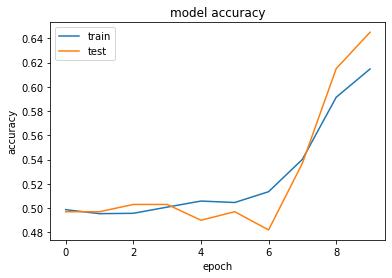

In [70]:
# Model Evaluation

import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [71]:
# model.save('mybrandnewmodel.h5')

In [72]:
model.load_weights('chatbot_10.h5')

In [73]:
pred_results = model.predict(([inputs_test,queries_test]))

In [75]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [81]:
pred_results[0]

array([1.45221534e-11, 1.38111180e-11, 1.72948270e-11, 1.15634603e-11,
       1.67721878e-11, 1.75598806e-11, 9.02904719e-02, 1.50383352e-11,
       1.29005131e-11, 1.82500542e-11, 1.55014473e-11, 1.26861282e-11,
       1.49233560e-11, 1.32554488e-11, 1.48429064e-11, 1.17185714e-11,
       8.17323900e-12, 1.40914173e-11, 1.22140770e-11, 9.09709513e-01,
       1.65924444e-11, 1.88044649e-11, 1.51151730e-11, 1.72970718e-11,
       1.13251040e-11, 1.38964664e-11, 1.11547577e-11, 1.26686222e-11,
       1.56941665e-11, 1.51452722e-11, 8.18715668e-12, 1.26868542e-11,
       1.03792079e-11, 1.48415481e-11, 1.03204988e-11, 1.21216847e-11,
       1.48622260e-11, 1.31780567e-11], dtype=float32)

In [78]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [79]:
test_data[0][2]

'no'

In [80]:
val_max = np.argmax(pred_results[0])

In [82]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [83]:
k

'went'

In [84]:
pred_results[0][val_max]

0.9097095

In [85]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [100]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [101]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [102]:
my_question = "Is the football in the garden ?"

In [103]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [104]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [105]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [106]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [107]:
my_ques

array([[30, 20,  3, 30, 12, 32]])

In [108]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [110]:
pred_results = model.predict(([my_story,my_ques]))


In [113]:
val_max = np.argmax(pred_results[0])

In [114]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key


In [115]:
k

'went'

In [116]:
pred_results[0][val_max]

0.9468018